In [1]:
import random
from tqdm import tqdm

POSITIONS = [
    'The Shire', 
    'Buckland', 
    'Old Forest', 
    'Fornost', 
    'Weather Hills', 
    'South Downs', 
    'Rhudaur', 
    'Eregion', 
    'Moria', 
    'Sladden Fields', 
    'Lorien', 
    'The Woid', 
    'Emyn Muil', 
    'Dead Marshes', 
    'Ithilien',
    'Minas Morgul',
    'Gorgoroth',
    'Mount Doom'
]

FELLOWSHIP_OCCUPATION = [1.0, 0.3, 0.7, 0.7, 0.7, 0.5, 0.5, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.1, 0.1, 0.1]

RING_CHECK = [False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, True, True, True]
    
assert(len(POSITIONS) == len(RING_CHECK))
    
def run_simulation(
    fellowships_occupation_proportion=None, 
    iterations=1000
): 
    """
    Runs multiple simulations of the game. 
    
    Parameters: 
    fellowships_occupation_proportion: the proportion of times the good guys are on the teritory with the ring. 
    iterations: the number of iterations to run the simulation. 
    
    Returns: A tuple of (fellowship_win_percent, ring_stop_locations)
    """
    
    total_runs = 0 # The total number of simulations run. 
    fellowship_wins = 0 # The number of simulations where the good guys win. 
    
    ring_stop_locations = {} # Record where the ring stops.
    for p in POSITIONS: 
        ring_stop_locations[p] = 0
        
    class RingFound(Exception): 
        pass
    
    for _ in tqdm(range(iterations)): # Perform one iteration of the simulation.
        
        ring_pos = 0 # Start the ring at the first teritory. 
        
        try: 
            while(ring_pos<len(POSITIONS)):
                prop = fellowships_occupation_proportion
                if(prop is None): 
                    prop = FELLOWSHIP_OCCUPATION[ring_pos]
                if(random.randint(1,12) == 12 and random.random() > prop): # Check to see if the ring is found. 
                    ring_found_location = POSITIONS[ring_pos] # Save the location it was found at. 
                    ring_stop_locations[ring_found_location] += 1
                    raise RingFound() # Jump to the end...
                if(RING_CHECK[ring_pos]): # Need to check if the ring advances. 
                    if(random.randint(1,6) > 3): #The ring advances. 
                        ring_pos += 1
                    else: 
                        pass # The ring does not advance. 
                else: # The ring always advances on this position. 
                    ring_pos += 1
            fellowship_wins += 1
        except RingFound as rf: # Jump to here when the ring is found. 
            pass
        total_runs += 1
            
    return (float(fellowship_wins)/float(total_runs), ring_stop_locations)

In [2]:
fellowship_win, ring_stop_locations = run_simulation(iterations=10_000_000)
print(f"Fellowship Win Percent: {fellowship_win}")

100%|██████████| 10000000/10000000 [04:29<00:00, 37064.78it/s]

Fellowship Win Percent: 0.3075191


Text(0, 0.5, 'Frequency')

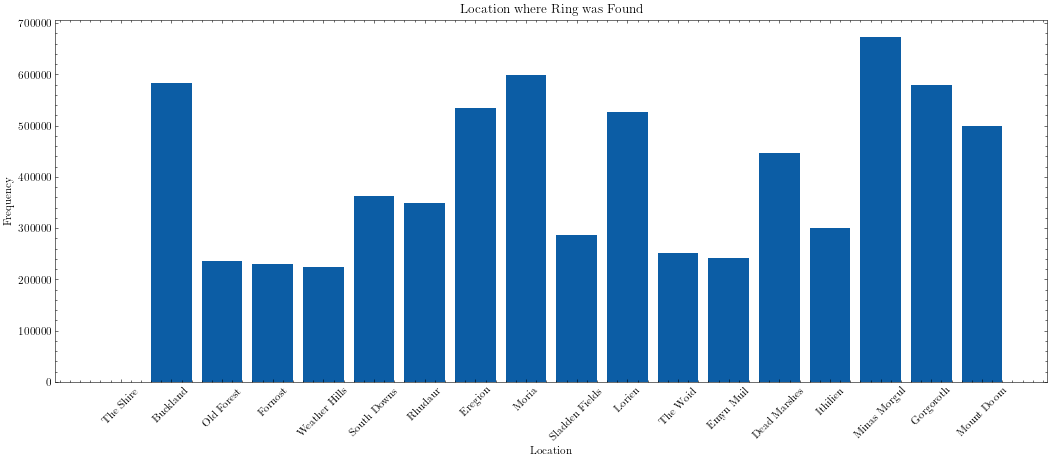

In [3]:
import matplotlib.pyplot as plt

plt.style.use(['science'])

plt.figure(figsize=(16, 6), dpi=80)

plt.bar(ring_stop_locations.keys(), ring_stop_locations.values())

plt.xticks(rotation = 45)
plt.title("Location where Ring was Found")
plt.xlabel("Location")
plt.ylabel("Frequency")